In [209]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

X dimensions: (100, 2)
y dimensions: (100, 1)


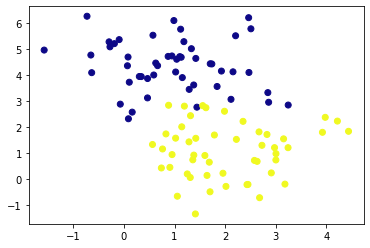

In [210]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print(f'X dimensions: {X.shape}')
print(f'y dimensions: {y.shape}')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.show()

In [211]:
def init(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b


In [212]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A


In [213]:
def log_loss(A, y):
    m = y.shape[0]
    return -(1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))


In [214]:
def gradients(A, X, y):
    m = y.shape[0]
    dW = (1 / m) * np.dot(X.T, A - y)
    db = (1 / m) * np.sum(A - y)
    return dW, db


In [215]:
def update(dW, db, W, b, learning_rate: int):
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b


In [216]:
def predict(X, W, b):
  A = model(X, W, b)
  print(A)
  return A >= 0.5

In [217]:
def perceptron(X, y, learning_rate: int = 0.001, n_iter: int = 10000):
    W, b = init(X)
    cost = []

    for _ in range(n_iter):
        A = model(X, W, b)
        cost.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    accuracy = accuracy_score(y, y_pred)

    print(f'Model accuracy: {accuracy}')
    plt.plot(cost, c='r')
    plt.show()

    return W, b


[[9.63479822e-01]
 [8.10202213e-01]
 [5.40721409e-03]
 [1.63314125e-01]
 [9.64593024e-01]
 [3.61731619e-01]
 [6.91361306e-02]
 [9.44189886e-01]
 [4.86995272e-02]
 [8.94697076e-01]
 [3.07355093e-02]
 [8.93757919e-01]
 [2.31424761e-02]
 [1.82989522e-02]
 [7.41791914e-01]
 [9.81605360e-01]
 [9.92090486e-01]
 [3.77468584e-02]
 [7.82884579e-01]
 [6.84073266e-01]
 [4.22936499e-02]
 [3.57712897e-02]
 [4.15641104e-01]
 [5.20063426e-03]
 [9.56494188e-01]
 [3.05498579e-02]
 [9.14081307e-01]
 [7.40089045e-03]
 [6.10611334e-02]
 [7.52978111e-01]
 [9.81679304e-01]
 [4.16395100e-02]
 [7.19257895e-01]
 [9.81956479e-01]
 [4.16545594e-01]
 [2.15820883e-01]
 [8.12200284e-01]
 [5.61049303e-01]
 [4.67812233e-01]
 [5.11900353e-01]
 [7.85305994e-02]
 [5.92148401e-02]
 [8.37121144e-04]
 [1.65787946e-01]
 [2.13578096e-01]
 [8.52278044e-01]
 [9.72779878e-01]
 [9.69134517e-01]
 [4.99871349e-03]
 [8.70343175e-03]
 [9.49307584e-01]
 [6.16715543e-01]
 [3.53862829e-02]
 [3.69208702e-02]
 [8.08040802e-01]
 [3.993359

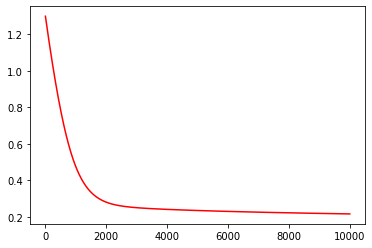

In [218]:
W, b = perceptron(X, y)


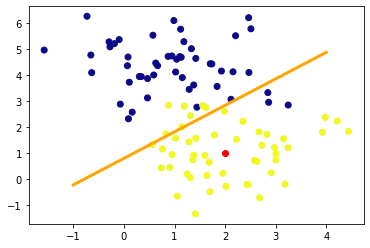

In [219]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, y.shape[0])
x1 = - (W[0] * x0 + b) / W[1]

plt.plot(x0, x1, c='orange', lw=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.show()

In [220]:
predict(new_plant, W, b)

[0.89128291]


array([ True])